# チュートリアル理想実験結果の描画
tutorial/idealを実行した後に, ユーザーガイドにあるxz図をpythonで描くノートブックです.
SCALEの分割出力ファイルを読み込む部分はmod_scaleという解析ライブラリを利用すると簡単です.

## ライブラリの読込
* numpy: 数値計算ライブラリ
* xarray: 
* matplotlib: 描画ライブラリ
* mod_scale.g_file: SCALE解析ライブラリ(ファイル関係). 現在いるディレクトリにリンクを貼っておく必要がある. (e.g., ln -s /home/hoge/mod_scale ./)

In [1]:
# Import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mod_scale.g_file import get_xrvar, get_fpathlist
plt.rcParams["font.size"]=15

## データ情報の設定
* dir1: scale-rm/tutorial/idealへのパス
* ftype: "history", "init", "restart"などのファイル種類
* domainlabel: "_d01"などのドメインラベル. なければ""
* timelabel: "_20070714-210000.000"などの時間ラベル. なければ""
* PRC_NUM_X,PRC_NUM_Y: SCALE実行時に*.confに指定したプロセス数.

In [2]:
# Data setting
dir1 = "./sampledata/scale-5.4.5/scale-rm/test/tutorial/ideal/"
ftype = "history" 
domainlabel = ""
timelabel = ""
PRC_NUM_X = 1
PRC_NUM_Y = 2

dir_out = "./fig/"
savefig = True

## プロット変数の設定
* varnamelist1: 変数名
* tplot: 描画タイミング(s)
* keylen: ベクトルの長さ(m/s)
* title, levels, cmap: タイトル, コンター区切り値, カラーマップ

In [3]:
# Plot setting
varnamelist1 = ["V", "W","QHYD"]

tplot = 60*20 # sec
keylen = 10 # vector

zmax = 10 # km
zmin = 0 # km

title1 = r"$\mathrm{QHYD\ (10^3 \ kg/kg)\ &\ V;W\ (m/s)}$"
levels1 = np.linspace(0,5,11)
cmap1 = "rainbow"
title2 = r"$\mathrm{W\ (m/s)\ &\ V;W\ (m/s)}$"
levels2 = np.linspace(-8,8,11)
cmap2 = "rainbow"

## SCALE出力ファイルの読込・結合
* get_fpathlist: ファイルリストの取得
* get_xrvar: xarrayオブジェクトの取得

In [4]:
# Read data
fpathlist =  get_fpathlist(dir1,ftype,domainlabel,timelabel,PRC_NUM_X,PRC_NUM_Y)
#print(fpathlist)
xrvar = get_xrvar(fpathlist)
#print(xrvar)

varlist1 = []
for varname1 in varnamelist1:
    varlist1.append(xrvar[varname1])

time = xrvar.coords["time"]
z = xrvar.coords["z"]
y = xrvar.coords["y"]
x = xrvar.coords["x"]
Y,Z=np.meshgrid(y,z)

ti = np.where(time==tplot)[0][0] #tsize = varlist1[2].shape[0]
    

## 描画
* 

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/var/folders/20/816pt6953lv90cycx2l_v75c0000gn/T/ipykernel_40315/2444054405.py:16: SyntaxWarning: invalid escape sequence '\m'
  ax2.quiverkey(q2, 0.85, 0.05, keylen, str(keylen)+'$\mathrm{\ m\ s^{-1}}$', labelpos='S', coordinates='figure')


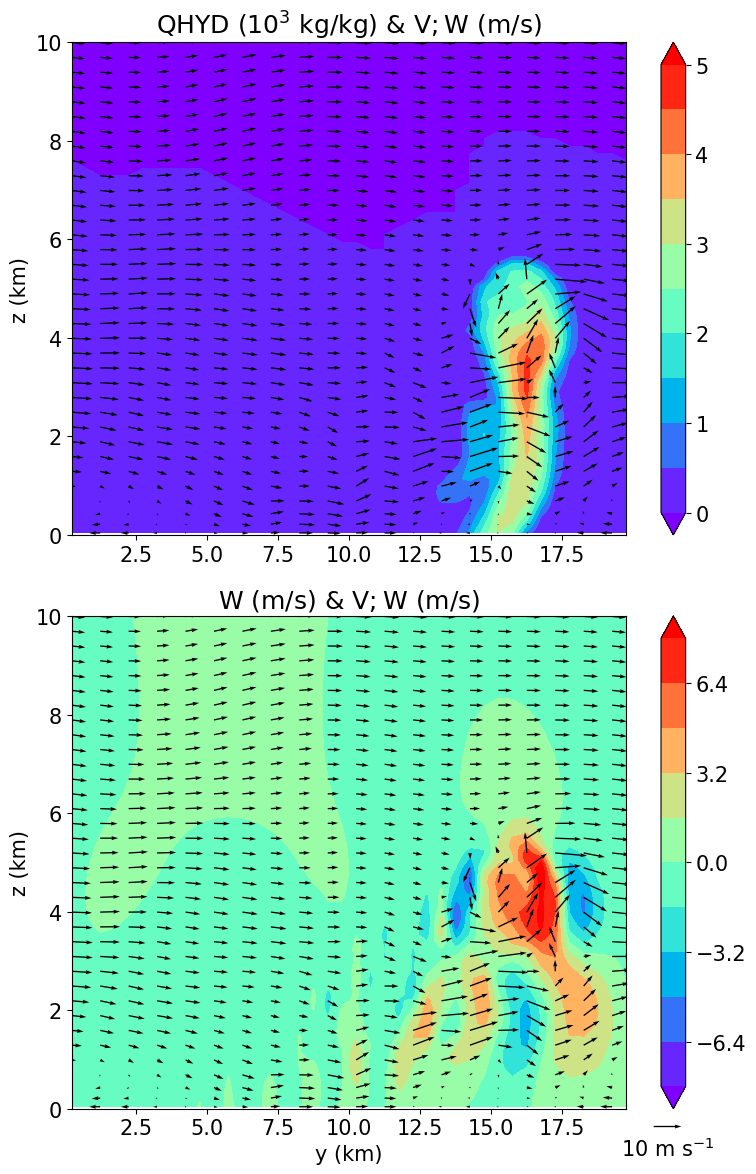

In [5]:
# Plot data
fig,axes = plt.subplots(2,1,figsize=(8,12))
ax1 = axes[0]
cax1 = ax1.contourf(Y*1e-3,Z*1e-3,varlist1[2][ti,:,:,0]*1e3,levels=levels1,cmap=cmap1,extend="both")
q1 = ax1.quiver(Y[::2,::2]*1e-3,Z[::2,::2]*1e-3,varlist1[0][ti,:,:,0][::2,::2],varlist1[1][ti,:,:,0][::2,::2],scale=200)
#ax1.quiverkey(q1, 0.75, 0.1, keylen, str(keylen)+'$\mathrm{\ m\ s^{-1}}$', labelpos='S', coordinates='figure')
plt.colorbar(cax1,ax=ax1)
ax1.set_ylim(zmin,zmax)
ax1.set_title(title1)
#ax1.set_xlabel("y (km)")
ax1.set_ylabel("z (km)")

ax2 = axes[1]
cax2 = ax2.contourf(Y*1e-3,Z*1e-3,varlist1[1][ti,:,:,0],levels=levels2,cmap=cmap2,extend="both")
q2 = ax2.quiver(Y[::2,::2]*1e-3,Z[::2,::2]*1e-3,varlist1[0][ti,:,:,0][::2,::2],varlist1[1][ti,:,:,0][::2,::2],scale=200)
ax2.quiverkey(q2, 0.85, 0.05, keylen, str(keylen)+'$\mathrm{\ m\ s^{-1}}$', labelpos='S', coordinates='figure')
plt.colorbar(cax2,ax=ax2)
ax2.set_ylim(zmin,zmax)
ax2.set_title(title2)
ax2.set_xlabel("y (km)")
ax2.set_ylabel("z (km)")

fig.tight_layout()
if savefig:
    fig.savefig(dir_out + "Tutorial_Ideal_XZ.png")